<a href="https://colab.research.google.com/github/isam-19/Construccion-ManipulacionDeDatos/blob/main/CONSTRUCCI%C3%93N_Y_MANIPULACI%C3%93N_DE_CONJUNTOS_DE_DATOS_UNIDAD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# APRENDE Y MEJORA CONSTRUCCIÓN Y MANIPULACIÓN DE CONJUNTOS DE DATOS UNIDAD 3
```
# María Isabel Marín Henao y Jhon Emilio Gómez Santamaría
```



**1. Preparación del entorno**

In [11]:
# Instalación de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cambio en el estilo de las gráficas
# Fuente: https://seaborn.pydata.org/generated/seaborn.set_style.html
# Fuente: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set(style="whitegrid")
numeric_colors = ['#5dade2', '#58d68d']
cat_colors = sns.color_palette("Set2")

# Subir y leer el dataset desde el PC
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('activity2_dataset.csv')

Saving activity2_dataset.csv to activity2_dataset (4).csv


**2. Limpieza de los datos**

In [12]:
# Reemplazar valores de texto inconsistentes y unificar formatos
df['sexo'] = df['sexo'].str.upper().str.strip()
df['estado civil'] = df['estado civil'].str.capitalize().str.strip()

# Reemplazar edades negativas por NaN
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')
df.loc[df['edad'] < 0, 'edad'] = np.nan

# Convertir ingresos y número de hijos en valores numéricos
df['ingresos'] = pd.to_numeric(df['ingresos'], errors='coerce')
df['estrato social'] = pd.to_numeric(df['estrato social'], errors='coerce')

# Mostrar el DataFrame limpio
df.head()

,edad,sexo,estado civil,numero de hijos,ingresos,estrato social
0,25.0,M,Soltero,0.0,3000.0,3.0
1,34.0,F,Casado,2.0,5000.0,2.0
2,NaN,F,NaN,1.0,4500.0,NaN
3,29.0,M,Soltero,3.0,NaN,1.0
4,45.0,M,Divorciado,NaN,3200.0,4.0


**3. Análisis estadistico de variables numéricas**

In [13]:
# Variables numéricas
variables_numericas = ['edad', 'ingresos']

# Medidas estadísticas
for col in variables_numericas:
    print(f"\n--- {col.upper()} ---")
    print("Media:", df[col].mean())
    print("Mediana:", df[col].median())
    print("Moda:", df[col].mode()[0] if not df[col].mode().empty else "No disponible")
    print("Desviación estándar:", df[col].std())
    print("Mínimo:", df[col].min())
    print("Máximo:", df[col].max())


--- EDAD ---
Media: 34.875
Mediana: 32.5
Moda: 25.0
Desviación estándar: 9.187530369240381
Mínimo: 25.0
Máximo: 52.0

--- INGRESOS ---
Media: 12766.666666666666
Mediana: 4000.0
Moda: 2500.0
Desviación estándar: 25315.854715968017
Mínimo: 2500.0
Máximo: 80000.0


**4. Visualización de variables numéricas**

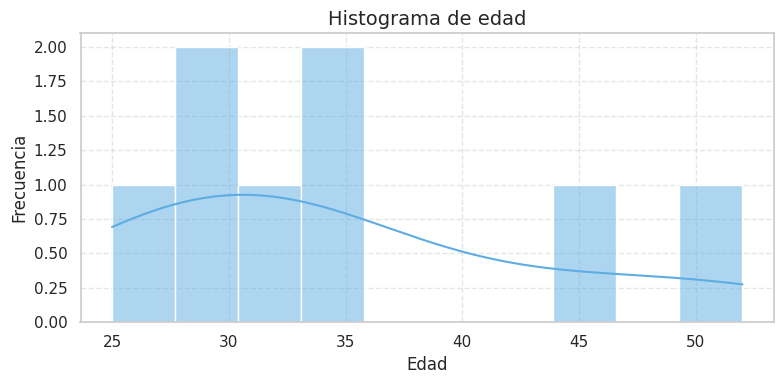

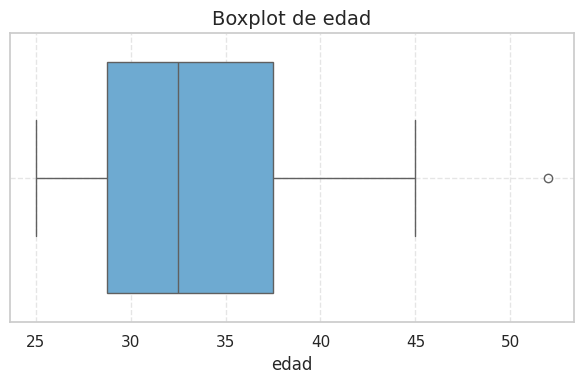

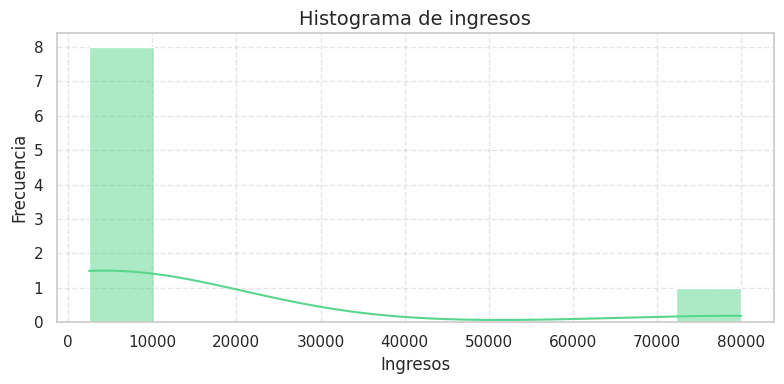

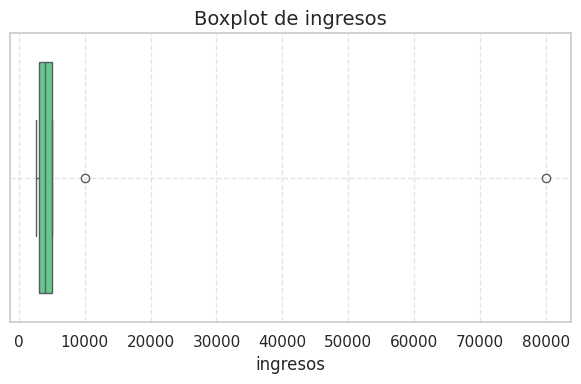

In [14]:
for idx, col in enumerate(['edad', 'ingresos']):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=10, color=numeric_colors[idx])
    plt.title(f'Histograma de {col}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color=numeric_colors[idx])
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

**Visualización de variables categóricas**

<ipython-input-15-3ce6aa8127f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=cat_colors,
<ipython-input-15-3ce6aa8127f3>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, x=col, palette=cat_colors,


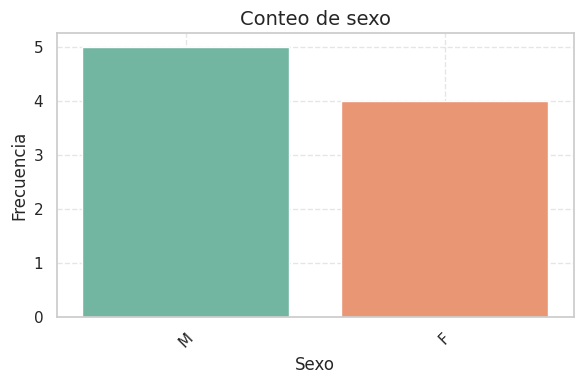

<ipython-input-15-3ce6aa8127f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=cat_colors,
<ipython-input-15-3ce6aa8127f3>:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df, x=col, palette=cat_colors,


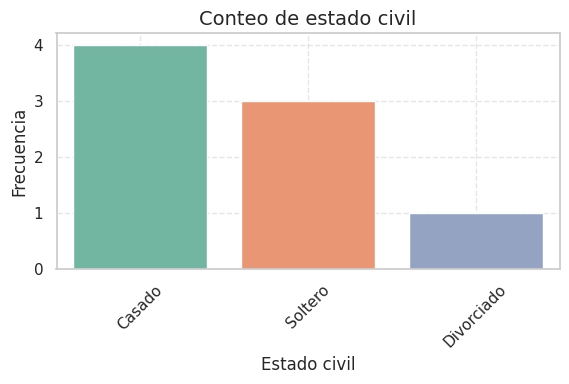

<ipython-input-15-3ce6aa8127f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=cat_colors,
<ipython-input-15-3ce6aa8127f3>:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(data=df, x=col, palette=cat_colors,


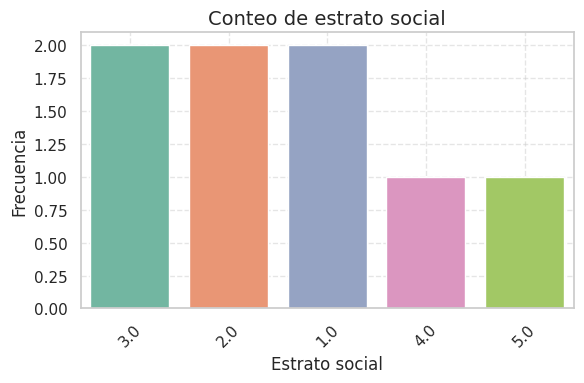

In [15]:
for col in ['sexo', 'estado civil', 'estrato social']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette=cat_colors,
                  order=df[col].dropna().value_counts().index)
    plt.title(f'Conteo de {col}', fontsize=14)
    plt.ylabel('Frecuencia')
    plt.xlabel(col.capitalize())
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()